In [1]:
#import
import pandas as pd
import numpy as np

In [2]:
#Filter the "total_votes" count is equal to or greater than 20 , avoid having division by zero errors later on.
df_vine= pd.read_csv('resources/vine_table.csv', index_col=False)

In [3]:
df_vine.dropna(how="any")

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R1007YJJIFAC9J,5,0,0,N,Y
1,R100F8VKMH0GML,5,0,0,N,Y
2,R100MQXHRT2RWR,1,0,0,N,Y
3,R100Q7Y0SUHCK9,4,0,0,N,N
4,R100QVXPVZS0DZ,5,0,0,N,Y
...,...,...,...,...,...,...
5330696,RZZ16EL59OVU,5,263,269,N,N
5330697,RZZ6F0AZ0IJ91,5,0,0,N,Y
5330698,RZZ934F7HW60X,3,15,17,N,Y
5330699,RZZ9Y3OZQWW1U,5,0,0,N,Y


In [4]:
df_vine.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R1007YJJIFAC9J,5,0,0,N,Y
1,R100F8VKMH0GML,5,0,0,N,Y
2,R100MQXHRT2RWR,1,0,0,N,Y
3,R100Q7Y0SUHCK9,4,0,0,N,N
4,R100QVXPVZS0DZ,5,0,0,N,Y


In [5]:
df_vine.dtypes

review_id            object
star_rating           int64
helpful_votes         int64
total_votes           int64
vine                 object
verified_purchase    object
dtype: object

In [6]:
df_vine_clean = df_vine[(df_vine['total_votes']>=20)]

In [7]:
df_vine_clean.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
53,R10A7V8JORM909,1,18,38,N,Y
99,R10H9GP2OV0G70,5,46,46,N,Y
116,R10K4ODD3K8SK1,2,36,49,N,N
207,R113D9FLRSOB1T,5,71,83,N,Y
242,R11ARMUBPZYS,4,15,22,N,Y


In [8]:
#Filter the new DataFrame or table created and create a new DataFrame or table to retrieve all the rows 
#where the number of helpful_votes divided by total_votes is equal to or greater than 50%.
df_vine_clean["%votes"] = (df_vine["helpful_votes"]/df_vine["total_votes"])


<ipython-input-8-5da88f9c173c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vine_clean["%votes"] = (df_vine["helpful_votes"]/df_vine["total_votes"])


In [9]:
df_vine_clean.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
53,R10A7V8JORM909,1,18,38,N,Y,0.473684
99,R10H9GP2OV0G70,5,46,46,N,Y,1.000000
116,R10K4ODD3K8SK1,2,36,49,N,N,0.734694
207,R113D9FLRSOB1T,5,71,83,N,Y,0.855422
242,R11ARMUBPZYS,4,15,22,N,Y,0.681818


In [10]:
df_vine_clean.dtypes

review_id             object
star_rating            int64
helpful_votes          int64
total_votes            int64
vine                  object
verified_purchase     object
%votes               float64
dtype: object

In [11]:
df_vine_greater_than_50 = df_vine_clean[(df_vine_clean["%votes"]) >= 0.5]

In [12]:
df_vine_greater_than_50.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
99,R10H9GP2OV0G70,5,46,46,N,Y,1.000000
116,R10K4ODD3K8SK1,2,36,49,N,N,0.734694
207,R113D9FLRSOB1T,5,71,83,N,Y,0.855422
242,R11ARMUBPZYS,4,15,22,N,Y,0.681818
244,R11BD8M9OCPVM2,1,15,24,N,N,0.625000


In [13]:
df_vine_greater_than_50.dtypes

review_id             object
star_rating            int64
helpful_votes          int64
total_votes            int64
vine                  object
verified_purchase     object
%votes               float64
dtype: object

In [14]:
#Filter the DataFrame or table created in Step 2, and create a new DataFrame or table that retrieves all the rows 
#where a review was written as part of the Vine program (paid), vine == 'Y'.
#df_vine_paid =df_vine_50[df_vine_50["vine"]=="Y"]

df_vine_paid = df_vine_greater_than_50[df_vine_greater_than_50["vine"]=='Y']
df_vine_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
1435,R14L8ATV3844Q6,5,18,21,Y,Y,0.857143
2003,R166C96XRN62DF,5,135,142,Y,N,0.950704
13519,R20AY3XICZFS7I,4,28,30,Y,N,0.933333
31656,R3B5S3OSA8N6AO,5,38,43,Y,N,0.883721
55313,R16BNZYYOS16XE,5,175,192,Y,N,0.911458


In [15]:
#Repeat Step 3, but this time retrieve all the rows 
#where the review was not part of the Vine program (unpaid), vine == 'N'.
df_vine_unpaid = df_vine_greater_than_50[df_vine_greater_than_50["vine"]=='N']
df_vine_unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
99,R10H9GP2OV0G70,5,46,46,N,Y,1.000000
116,R10K4ODD3K8SK1,2,36,49,N,N,0.734694
207,R113D9FLRSOB1T,5,71,83,N,Y,0.855422
242,R11ARMUBPZYS,4,15,22,N,Y,0.681818
244,R11BD8M9OCPVM2,1,15,24,N,N,0.625000


In [17]:
#Determine the total number of reviews, the number of 5-star reviews, 
#and the percentage of 5-star reviews for the two types of review (paid vs unpaid).

Five_star_paid=df_vine_paid[df_vine_paid['star_rating'] == 5]
Five_star_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
1435,R14L8ATV3844Q6,5,18,21,Y,Y,0.857143
2003,R166C96XRN62DF,5,135,142,Y,N,0.950704
31656,R3B5S3OSA8N6AO,5,38,43,Y,N,0.883721
55313,R16BNZYYOS16XE,5,175,192,Y,N,0.911458
165236,R18TVJ8BDK6LD6,5,25,27,Y,N,0.925926


In [41]:
Five_star_Unpaid=df_vine_unpaid[df_vine_unpaid ['star_rating'] == 5]
Five_star_Unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
99,R10H9GP2OV0G70,5,46,46,N,Y,1.000000
207,R113D9FLRSOB1T,5,71,83,N,Y,0.855422
282,R105YT1778GNLZ,5,23,32,N,Y,0.718750
366,R10KEO8SETOUTD,5,41,43,N,Y,0.953488
368,R10KV4Y7SJWXNK,5,27,40,N,Y,0.675000


In [35]:
Five_star_paid_count = len(Five_star_paid["review_id"].unique())
Five_star_paid_count

220

In [42]:
Five_star_unpaid_count = len(Five_star_Unpaid["review_id"].unique())
Five_star_unpaid_count

74445

In [43]:
total_paid =len(df_vine_paid["review_id"])
total_paid

497

In [44]:
total_unpaid =len(df_vine_unpaid["review_id"])
total_unpaid

120825

In [45]:
#  Pecentage of five-star reviews in Vine (220/497)
Percentage_fivestar_paid =(Five_star_paid_count/total_paid)
Percentage_fivestar_paid

0.4426559356136821

In [47]:
#  Pecentage of five-star reviews in Vine(74445/120825)
Percentage_fivestar_unpaid =(Five_star_unpaid_count/total_unpaid)
Percentage_fivestar_unpaid

0.6161390440720049

In [50]:
#additional analysis 
Four_star_paid= df_vine_paid[df_vine_paid['star_rating'] == 4]
Four_star_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
13519,R20AY3XICZFS7I,4,28,30,Y,N,0.933333
91142,R3POVP3DKUW1K8,4,29,36,Y,N,0.805556
99241,RJ2Y4ETBS5CE8,4,41,42,Y,N,0.976190
113534,R1E5L9YODLAINF,4,55,69,Y,N,0.797101
175334,R2775YU3WYTS72,4,43,49,Y,N,0.877551


In [54]:
four_star_paid_count = len(Four_star_paid["review_id"].unique())
four_star_paid_count

130

In [60]:
#four star % paid 
Percentage_fourstar_paid =(four_star_paid_count/total_paid)
Percentage_fourstar_paid

0.26156941649899396

In [51]:
Four_star_Unpaid=df_vine_unpaid[df_vine_unpaid ['star_rating'] == 4]
Four_star_Unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
242,R11ARMUBPZYS,4,15,22,N,Y,0.681818
274,R103UPE2JEWXEC,4,20,20,N,N,1.000000
490,R11UAD4SBTQAB9,4,39,41,N,Y,0.951220
1027,R13UQUFH9JO03N,4,32,34,N,Y,0.941176
1248,R12H9VB39IYJJN,4,14,21,N,Y,0.666667


In [61]:
four_star_unpaid_count = len(Four_star_Unpaid["review_id"].unique())
four_star_unpaid_count

13017

In [62]:
#four star % unpaid 
Percentage_fourstar_unpaid =(four_star_unpaid_count/total_unpaid)
Percentage_fourstar_unpaid

0.10773432650527623

In [63]:
Three_star_paid= df_vine_paid[df_vine_paid['star_rating'] == 3]
Three_star_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
62691,R1ON04B0O4R11U,3,681,726,Y,N,0.938017
124811,R2BY9H88I1EVUB,3,504,556,Y,N,0.906475
287609,R29WBSU7JH1Q2Q,3,38,53,Y,N,0.716981
311143,R6OQZADDWEK3E,3,52,72,Y,N,0.722222
328551,R1F98P2CXNMMLB,3,90,94,Y,N,0.957447


In [66]:
Three_star_paid_count = len(Three_star_paid["review_id"].unique())
Three_star_paid_count

77

In [67]:
Percentage_threestar_paid =(Three_star_paid_count/total_paid)
Percentage_threestar_paid

0.15492957746478872

In [64]:
Three_star_Unpaid=df_vine_unpaid[df_vine_unpaid ['star_rating'] == 3]
Three_star_Unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
511,R11WTE2ZUV8Q1Q,3,36,54,N,N,0.666667
1045,R13Y1CPG9LF44Z,3,62,89,N,N,0.696629
1250,R12HMZ6TGXEW6Y,3,27,36,N,N,0.750000
4612,R1D66J76QQOFY3,3,21,24,N,Y,0.875000
5251,R1CPZKRZFDCWN5,3,102,157,N,Y,0.649682


In [68]:
Three_star_unpaid_count = len(Three_star_Unpaid["review_id"].unique())
Three_star_unpaid_count

6950

In [78]:
Percentage_threestar_unpaid =(Three_star_unpaid_count/total_unpaid)
Percentage_threestar_unpaid

0.05752120835919718

In [73]:
Two_star_paid= df_vine_paid[df_vine_paid['star_rating'] == 2]
Two_star_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
222341,R1G0A5PCYUOAPR,2,19,24,Y,N,0.791667
233472,R2L6FEG9JS0BIS,2,31,32,Y,N,0.968750
310383,RJ9ZCF2V76C79,2,27,35,Y,N,0.771429
593020,R1ZHBZF2M2UM6P,2,37,48,Y,N,0.770833
608332,R23QJK9DEYG5IZ,2,43,52,Y,N,0.826923


In [74]:
Two_star_paid_count = len(Two_star_paid["review_id"].unique())
Two_star_paid_count

39

In [75]:
Percentage_twostar_paid =(Two_star_paid_count/total_paid)
Percentage_twostar_paid

0.07847082494969819

In [71]:
Two_star_Unpaid=df_vine_unpaid[df_vine_unpaid ['star_rating'] == 2]
Two_star_Unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
116,R10K4ODD3K8SK1,2,36,49,N,N,0.734694
1313,R12T7HF8F7J2UL,2,40,62,N,N,0.645161
1603,R15GFZQ54OJFWN,2,458,464,N,N,0.987069
2022,R169UEWBFW23CE,2,46,48,N,Y,0.958333
2931,R1727NCTPKM08B,2,63,67,N,Y,0.940299


In [76]:
Two_star_unpaid_count = len(Two_star_Unpaid["review_id"].unique())
Two_star_unpaid_count

5181

In [77]:
Percentage_twostar_unpaid =(Two_star_unpaid_count/total_unpaid)
Percentage_twostar_unpaid

0.04288019863438858

In [52]:
one_star_paid=df_vine_paid[df_vine_paid['star_rating'] == 1]
one_star_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
94779,R6K8ODDN8RG0Z,1,46,60,Y,N,0.766667
187993,R33P0HCV4KYOTN,1,352,378,Y,N,0.931217
244181,R3DDP9H0J1EYH7,1,11,20,Y,N,0.550000
266223,RXUSDD2Q6NA6X,1,30,35,Y,N,0.857143
366999,RBKF410LEI77N,1,687,748,Y,Y,0.918449


In [56]:
one_star_paid_count = len(one_star_paid["review_id"].unique())
one_star_paid_count

31

In [58]:
#one star % paid 
Percentage_onestar_paid =(one_star_paid_count/total_paid)
Percentage_onestar_paid

0.06237424547283702

In [53]:
one_star_Unpaid=df_vine_unpaid[df_vine_unpaid ['star_rating'] == 1]
one_star_Unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
244,R11BD8M9OCPVM2,1,15,24,N,N,0.625000
462,R11NHU37112B6L,1,37,45,N,Y,0.822222
779,R11AK4NR5RJATI,1,16,21,N,Y,0.761905
1665,R13ABZFTYFB7C6,1,109,136,N,N,0.801471
1784,R13YOUWZK88XNW,1,72,81,N,N,0.888889


In [57]:
one_star_unpaid_count = len(one_star_Unpaid["review_id"].unique())
one_star_unpaid_count

21232

In [59]:
#one star % unpaid 
Percentage_fivestar_unpaid =(one_star_unpaid_count/total_unpaid)
Percentage_fivestar_unpaid

0.17572522242913305

In [79]:
#plot DF paid and rating 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
  


In [90]:
df_vine_paid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
1435,R14L8ATV3844Q6,5,18,21,Y,Y,0.857143
2003,R166C96XRN62DF,5,135,142,Y,N,0.950704
13519,R20AY3XICZFS7I,4,28,30,Y,N,0.933333
31656,R3B5S3OSA8N6AO,5,38,43,Y,N,0.883721
55313,R16BNZYYOS16XE,5,175,192,Y,N,0.911458


<AxesSubplot:ylabel='Density'>

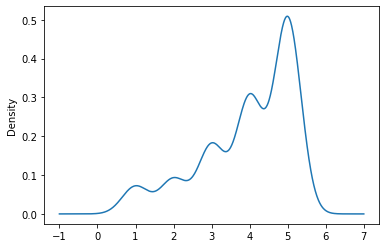

In [85]:
# plot to see distribution of star rating 
df_vine_paid["star_rating"].plot(kind = 'density')

In [87]:
df_vine_paid.describe()

,star_rating,helpful_votes,total_votes,%votes
count,497.000000,497.000000,497.000000,497.000000
mean,3.943662,79.887324,89.293763,0.864037
std,1.213518,151.519572,163.205510,0.102612
min,1.000000,11.000000,20.000000,0.521127
25%,3.000000,23.000000,26.000000,0.800000
50%,4.000000,34.000000,41.000000,0.888889
75%,5.000000,71.000000,81.000000,0.943423
max,5.000000,1843.000000,2042.000000,1.000000


<AxesSubplot:ylabel='Density'>

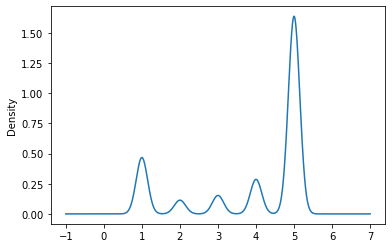

In [86]:
#plot df unpaid and rating 
df_vine_unpaid["star_rating"].plot(kind ='density')

In [89]:
df_vine_unpaid.head(5)

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,%votes
99,R10H9GP2OV0G70,5,46,46,N,Y,1.000000
116,R10K4ODD3K8SK1,2,36,49,N,N,0.734694
207,R113D9FLRSOB1T,5,71,83,N,Y,0.855422
242,R11ARMUBPZYS,4,15,22,N,Y,0.681818
244,R11BD8M9OCPVM2,1,15,24,N,N,0.625000


In [88]:
df_vine_unpaid.describe()

,star_rating,helpful_votes,total_votes,%votes
count,120825.000000,120825.000000,120825.000000,120825.000000
mean,3.945682,52.800497,60.174194,0.859185
std,1.556849,135.640773,143.176131,0.113466
min,1.000000,10.000000,20.000000,0.500000
25%,3.000000,21.000000,25.000000,0.794872
50%,5.000000,29.000000,34.000000,0.888889
75%,5.000000,50.000000,57.000000,0.950000
max,5.000000,16401.000000,17182.000000,1.000000
